<a href="https://colab.research.google.com/github/pedroblossbraga/Aprendizado-de-Maquina-com-Python/blob/main/1_Valida%C3%A7%C3%A3o_Cruzada_(CrossValidation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validação Cruzada de K "folhas"
- É uma técnica de avalização da capacidade de generalização de um modelo, a partir de dados de input.
- Em outras palavras, expressa a performance do modelo para diferentes amostras de dados, e como o modelo performa de acordo com essa diversidade
- É útil para combater o overfitting (super-ajuste do modelo, falha de generalização)

## Formulação

Por exemplo, dada uma sequência $\{ x_j \}_{j=1}^N$ de $N$ valores.

Seja $\mathcal{P}: \mathbb{R}^n \rightarrow \mathbb{R}$ a função de avaliação de performance.

A performance de validação cruzada $\mathcal{P}_{CV}$ pode ser computada :
- dividindo os dados em $K-1$ sub-amostras:

\begin{equation}
\{\{x_j \}_{j=1}^{\frac{N}{K}}, \quad \{x_j \}_{j=\frac{N}{K}+1}^{\frac{2N}{K}}, \quad ... \quad \{x_j\}_{j=\frac{(K-1)N}{K}+1}^{N} \}= \{s_k\}_k^{N-1} \in \mathbb{R}^n
\end{equation}

- computando a performance para cada sub-amostra:

\begin{equation}
\{ \mathcal{P}(s_k)\}_{s_k \in  \{s_k\}}
\end{equation}

- computando a média do vetor de performances:

\begin{equation}
\mathcal{P}_{CV} = \frac{1}{K}\sum_{i=0}^{K-1} \mathcal{P}(\{x_j\}_{j=(\frac{iN}{K})+1}^{\frac{(i+1)N}{K}})
\end{equation}

- Observação: o pré-processamento dos dados (escalonamento em uma determinada distribuição) é outro método importante para regularização do modelo


## Links:
- https://scikit-learn.org/stable/modules/cross_validation.html


## Exemplo:

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm

## extraindo os dados
X,y = datasets.load_iris(return_X_y=True)
## train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

## definindo um modelo e ajustando-o (fitting)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

In [ ]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
print("acurácia média: %0.3f (+- %0.3f (desvio padrão))" %(scores.mean(), scores.std()))

acurácia média: 0.980 (+- 0.016 (desvio padrão))


### Dica

- com **pipeline** torna-se fácil de implementar validação cruzada juntamente ao pré-processamento, estimando a performance:

In [ ]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 0.93333333, 0.95555556, 0.93333333, 0.97777778])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


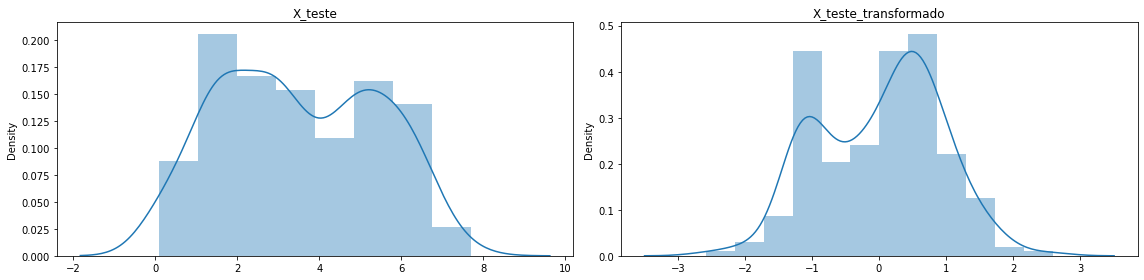

In [ ]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_transformed = scaler.transform(X_train)

clf = svm.SVC(C=1).fit(X_train_transformed, y_train)

X_test_transformed = scaler.transform(X_test)

## plotando as distribuições
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.title('X_teste')
sns.distplot(X_test)

plt.subplot(1,2,2)
plt.title('X_teste_transformado')
sns.distplot(X_test_transformed)

plt.tight_layout()
plt.show()